In [1]:
import ODT_new_transitions as ODT
from PhysicalConstants import SpeedOfLight as c
from math import pi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm

In [42]:
ground = ODT.energy_level(configuration='5s2', term='1S', J=0)
excited = ODT.energy_level(configuration='5s5p', term='3P', J=1)
metastable = ODT.energy_level(configuration='5s5p', term='3P', J=2)

Lambda_laser = np.linspace(480, 1600, 3800)
# Lambda_laser = np.logspace(np.log10(470), np.log10(6000), 5000)
Ags = []
Aes = []
Aev = []
Aet = []

for lambda_laser in tqdm(Lambda_laser):

#     print(f'{lambda_laser = }nm')
    omega_laser = 2 * pi * c / (lambda_laser*1e-9)
    alphag_scalar, _, _ = ODT.polarizabilities(ground, ODT.transition0, omega_laser)
#     print(f'g scalar polarizability {alphag_scalar/ODT.alpha_atomic_unit:.1f} a.u.')
    alphae_scalar, alphae_vector, alphae_tensor = ODT.polarizabilities(excited, ODT.transition1, omega_laser)
#     print(f'e scalar polarizability {alphae_scalar/ODT.alpha_atomic_unit:.1f} a.u.')
#     print(f'e vector polarizability {alphae_vector/ODT.alpha_atomic_unit:.1f} a.u.')
#     print(f'e tensor polarizability {alphae_tensor/ODT.alpha_atomic_unit:.1f} a.u.')

    Ags += [alphag_scalar/ODT.alpha_atomic_unit]
    Aes += [alphae_scalar/ODT.alpha_atomic_unit]
    Aev += [alphae_vector/ODT.alpha_atomic_unit]
    Aet += [alphae_tensor/ODT.alpha_atomic_unit]

100%|███████████████████████████████████████████████████████████████████████████████| 5000/5000 [04:12<00:00, 19.77it/s]


In [44]:
P = pd.DataFrame({'lambda':Lambda_laser, 'ag_s':Ags, 'ae_s':Aes, 'ae_v':Aev, 'ae_t':Aet})
P.to_csv("predicted-polarizabilities.csv")
# P.to_csv("predicted-polarizabilities-logspace.csv")
P

,lambda,ag_s,ae_s,ae_v,ae_t
0,470.000000,4840.279535,-3014.711548,-1838.052676,263.172218
1,470.239506,4720.414081,-3251.888290,-2131.521635,284.386241
2,470.479135,4606.469041,-3544.288262,-2504.858891,310.903281
3,470.718885,4498.016398,-3915.680268,-2993.482844,345.074882
4,470.958758,4394.668424,-4406.015326,-3657.058436,390.867146
...,...,...,...,...,...
4995,5987.785451,197.455541,525.964837,109.075470,26.990896
4996,5990.836755,197.454396,525.870783,108.990563,26.985365
4997,5993.889614,197.453251,525.776873,108.905759,26.979843
4998,5996.944029,197.452108,525.683106,108.821057,26.974329


In [4]:
P = pd.read_csv("predicted-polarizabilities.csv", index_col=0)

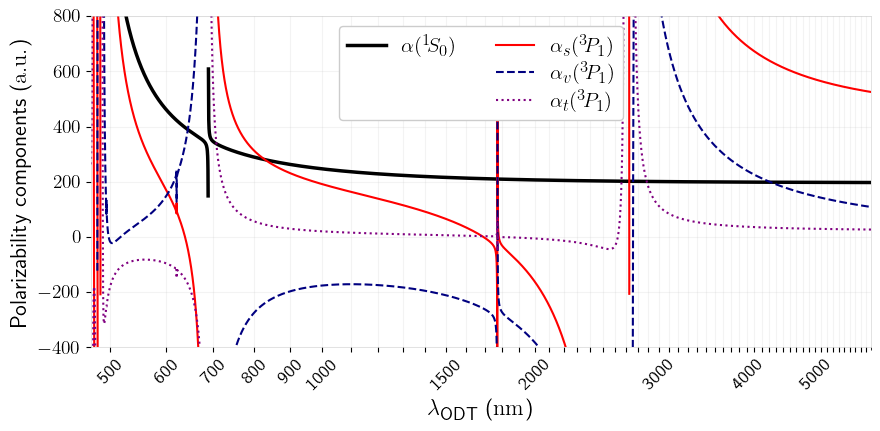

In [55]:
# plt.figure(figsize=(9,4.5))
# ag_s = np.where((P['ag_s'] < -1000) | (P['ag_s'] > 900), np.nan, P['ag_s'])
# plt.plot(P['lambda'], ag_s, color='black', lw=2.5, label=r"$\alpha({}^1\!S_0)$")
# plt.plot([0], marker='None', linestyle='None', label=' ')
# plt.plot([0], marker='None', linestyle='None', label=' ')
# ae_s = np.where((P['ae_s'] < -800) | (P['ae_s'] > 2000), np.nan, P['ae_s'])
# ae_v = np.where((P['ae_v'] < -800) | (P['ae_v'] > 2000), np.nan, P['ae_v'])
# ae_t = np.where((P['ae_t'] < -800) | (P['ae_t'] > 2000), np.nan, P['ae_t'])
# plt.plot(P['lambda'], ae_s, color='red', label=r"$\alpha_s({}^3\!P_1)$")
# plt.plot(P['lambda'], ae_v, color='navy', linestyle='--', label=r"$\alpha_v({}^3\!P_1)$")
# plt.plot(P['lambda'], ae_t, color='purple', linestyle='dotted', label=r"$\alpha_t({}^3\!P_1)$")
# plt.ylim(-400,800)
# plt.xscale('log')
# labels = [None]*55
# labels[0] = 500
# labels[1] = 600
# labels[2] = 700
# labels[3] = 800
# labels[4] = 900
# labels[5] = 1000
# labels[10] = 1500
# labels[15] = 2000
# labels[25] = 3000
# labels[35] = 4000
# labels[45] = 5000
# plt.xticks(np.arange(500,6000,100), labels, rotation=45)
# plt.xlim(np.min(P['lambda']),np.max(P['lambda']))
# plt.grid(alpha=0.15)
# plt.xlabel(r"$\lambda_\mathsf{ODT}$ ($\mathrm{nm}$)")
# plt.ylabel(r"Polarizability components ($\mathrm{a.u.}$)")
# plt.legend(ncol=2, framealpha=1)
# plt.tight_layout()
# plt.savefig("polarizability-components-curves-470-6000nm-log.pdf")

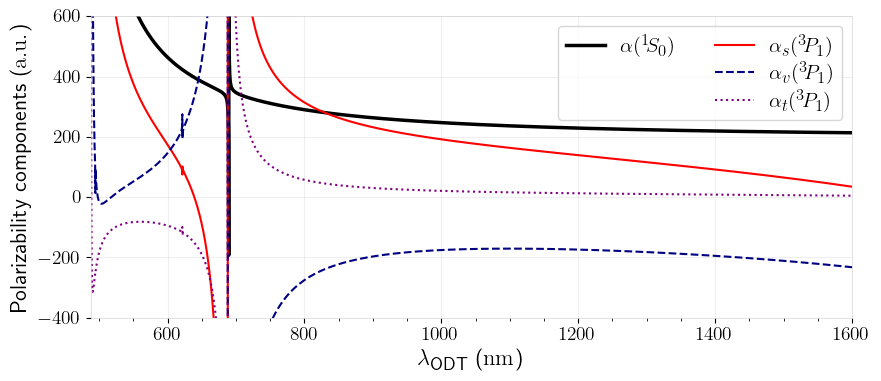

In [10]:
plt.figure(figsize=(9,4))
plt.plot(P['lambda'], P['ag_s'], color='black', lw=2.5, label=r"$\alpha({}^1\!S_0)$")
plt.plot([0], marker='None', linestyle='None', label=' ')
plt.plot([0], marker='None', linestyle='None', label=' ')
plt.plot(P['lambda'], P['ae_s'], color='red', label=r"$\alpha_s({}^3\!P_1)$")
plt.plot(P['lambda'], P['ae_v'], color='navy', linestyle='--', label=r"$\alpha_v({}^3\!P_1)$")
plt.plot(P['lambda'], P['ae_t'], color='purple', linestyle='dotted', label=r"$\alpha_t({}^3\!P_1)$")
plt.ylim(-400,600)
plt.xlim(488,np.max(P['lambda']))
plt.grid(alpha=0.2)
plt.xlabel(r"$\lambda_\mathsf{ODT}$ ($\mathrm{nm}$)")
plt.ylabel(r"Polarizability components ($\mathrm{a.u.}$)")
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("polarizability-components-curves-488-1600nm.pdf")

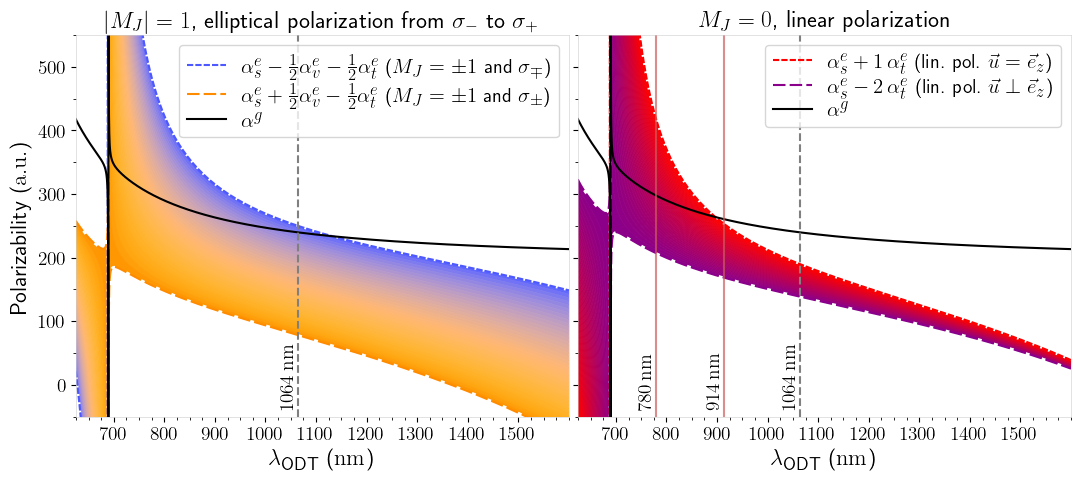

In [7]:
plt.subplots(1, 2, figsize=(11,5), sharey=True)
plt.subplot(1, 2, 1)

c_b = np.array([0.3,0.35,1])
c_a = np.array(mpl.colors.to_rgb('darkorange'))

N = 40
for n in range(0,N):
    cv_0 = -1. + 2.*n/N
    cv_1 = -1. + 2.*(n+1)/N
    x = (n+0.5)/N
    gamma = 0.6
    c = ( (c_a * x)**gamma + (c_b * (1-x))**gamma )**(1/gamma)
    c = np.minimum(c,1)
    plt.fill_between(
        P['lambda'],
        P['ae_s'] - P['ae_t']/2 + cv_0*P['ae_v']/2,
        P['ae_s'] - P['ae_t']/2 + cv_1*P['ae_v']/2,
        color=c, linewidth=0.5
    )
plt.plot(
    P['lambda'],
    P['ae_s']-P['ae_t']/2-P['ae_v']/2,
    color=c_b, dashes=[3,1], gapcolor='white',
    label=r"$\alpha_s^e-\frac{1}{2}\alpha_v^e-\frac{1}{2}\alpha_t^e$ ($M_J=\pm 1$ and $\sigma_\mp$)"
)
plt.plot(
    P['lambda'],
    P['ae_s']-P['ae_t']/2+P['ae_v']/2,
    color=c_a, dashes=[6,2], gapcolor='white',
    label=r"$\alpha_s^e+\frac{1}{2}\alpha_v^e-\frac{1}{2}\alpha_t^e$ ($M_J=\pm 1$ and $\sigma_\pm$)"
)

plt.plot(P['lambda'], P['ag_s'], color='black', label=r"$\alpha^g$")


plt.ylim(-50,550)
plt.xlim(625,1600)
plt.xticks(np.arange(700,1600,100))
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
plt.xlabel(r"$\lambda_\mathsf{ODT}$ ($\mathrm{nm}$)")
plt.ylabel(r"Polarizability ($\mathrm{a.u.}$)")
# plt.ylabel(r"Groud ($^1S_0$) and excited state ($^3P_1,M_J=\pm 1$)")

plt.axvline(x=1064, color='grey', linestyle='--')
plt.text(1064-10, -40, r"$1064\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')

plt.title(r"$|M_J|=1$, elliptical polarization from $\sigma_-$ to $\sigma_+$")
plt.legend()

###############

plt.subplot(1, 2, 2)

c_a = np.array([1,0,0])
c_b = np.array(mpl.colors.to_rgb('darkmagenta'))

N = 40
for n in range(0,N):
    ct_0 = -2. + 3.*n/N
    ct_1 = -2. + 3.*(n+1)/N
    x = (n+0.5)/N
    gamma = 1
    c = ( (c_a * x)**gamma + (c_b * (1-x))**gamma )**(1/gamma)
    c = np.minimum(c,1)
    plt.fill_between(
        P['lambda'],
        P['ae_s'] + ct_0 * P['ae_t'],
        P['ae_s'] + ct_1 * P['ae_t'],
        color=c, linewidth=0.5
    )
plt.plot(
    P['lambda'],
    P['ae_s']+P['ae_t'],
    color=c_a, dashes=[3,1], gapcolor='white',
    label=r"$\alpha_s^e+1\,\alpha_t^e$ (lin.~pol.~$\vec{u}=\vec{e}_z$)"
)
plt.plot(
    P['lambda'],
    P['ae_s']-2*P['ae_t'],
    color=c_b, dashes=[6,2], gapcolor='white',
    label=r"$\alpha_s^e-2\,\alpha_t^e$ (lin.~pol.~$\vec{u}\perp\vec{e}_z$)"
)

plt.plot(P['lambda'], P['ag_s'], color='black', label=r"$\alpha^g$")


plt.ylim(-50,550)
plt.xlim(625,1600)
plt.xticks(np.arange(700,1600,100))
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
plt.xlabel(r"$\lambda_\mathsf{ODT}$ ($\mathrm{nm}$)")

plt.axvline(x=1064, color='grey', linestyle='--')
plt.text(1064-10, -40, r"$1064\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')
plt.axvline(x=914, color='indianred', linestyle='solid', alpha=0.7)
plt.text(914-10, -40, r"$914\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')
plt.axvline(x=780, color='indianred', linestyle='solid', alpha=0.7)
plt.text(780-10, -40, r"$780\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')


plt.title("$M_J=0$, linear polarization")
plt.legend()

###############

# plt.suptitle("Predicted polarizabilities for the $g={}^1S_0$ and $e={}^3P_1$ levels")
plt.tight_layout(w_pad=0.1)
plt.savefig("polarizability-curves-600-1600nm.horiz.pdf")

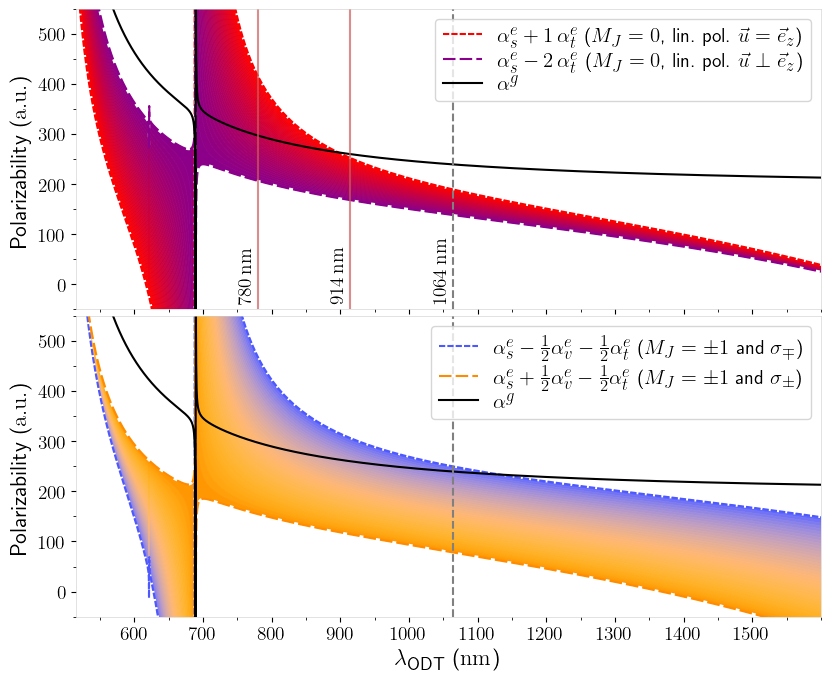

In [8]:
plt.subplots(2, 1, figsize=(8.5,7), sharex=True)
plt.subplot(2, 1, 2)

c_b = np.array([0.3,0.35,1])
c_a = np.array(mpl.colors.to_rgb('darkorange'))

N = 40
for n in range(0,N):
    cv_0 = -1. + 2.*n/N
    cv_1 = -1. + 2.*(n+1)/N
    x = (n+0.5)/N
    gamma = 0.6
    c = ( (c_a * x)**gamma + (c_b * (1-x))**gamma )**(1/gamma)
    c = np.minimum(c,1)
    plt.fill_between(
        P['lambda'],
        P['ae_s'] - P['ae_t']/2 + cv_0*P['ae_v']/2,
        P['ae_s'] - P['ae_t']/2 + cv_1*P['ae_v']/2,
        color=c, linewidth=0.5
    )
plt.plot(
    P['lambda'],
    P['ae_s']-P['ae_t']/2-P['ae_v']/2,
    color=c_b, dashes=[3,1], gapcolor='white',
    label=r"$\alpha_s^e-\frac{1}{2}\alpha_v^e-\frac{1}{2}\alpha_t^e$ ($M_J=\pm 1$ and $\sigma_\mp$)"
)
plt.plot(
    P['lambda'],
    P['ae_s']-P['ae_t']/2+P['ae_v']/2,
    color=c_a, dashes=[6,2], gapcolor='white',
    label=r"$\alpha_s^e+\frac{1}{2}\alpha_v^e-\frac{1}{2}\alpha_t^e$ ($M_J=\pm 1$ and $\sigma_\pm$)"
)

plt.plot(P['lambda'], P['ag_s'], color='black', label=r"$\alpha^g$")


plt.ylim(-50,550)
plt.xlim(515,1600)
plt.xticks(np.arange(600,1600,100))
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
plt.ylabel(r"Polarizability ($\mathrm{a.u.}$)")

plt.axvline(x=1064, color='grey', linestyle='--')

plt.xlabel(r"$\lambda_\mathsf{ODT}$ ($\mathrm{nm}$)")

# plt.title(r"$|M_J|=1$, elliptical polarization from $\sigma_-$ to $\sigma_+$")
plt.legend()

###############

plt.subplot(2, 1, 1)

c_a = np.array([1,0,0])
c_b = np.array(mpl.colors.to_rgb('darkmagenta'))

N = 40
for n in range(0,N):
    ct_0 = -2. + 3.*n/N
    ct_1 = -2. + 3.*(n+1)/N
    x = (n+0.5)/N
    gamma = 1
    c = ( (c_a * x)**gamma + (c_b * (1-x))**gamma )**(1/gamma)
    c = np.minimum(c,1)
    plt.fill_between(
        P['lambda'],
        P['ae_s'] + ct_0 * P['ae_t'],
        P['ae_s'] + ct_1 * P['ae_t'],
        color=c, linewidth=0.5
    )
plt.plot(
    P['lambda'],
    P['ae_s']+P['ae_t'],
    color=c_a, dashes=[3,1], gapcolor='white',
    label=r"$\alpha_s^e+1\,\alpha_t^e$ ($M_J=0$, lin.~pol.~$\vec{u}=\vec{e}_z$)"
)
plt.plot(
    P['lambda'],
    P['ae_s']-2*P['ae_t'],
    color=c_b, dashes=[6,2], gapcolor='white',
    label=r"$\alpha_s^e-2\,\alpha_t^e$ ($M_J=0$, lin.~pol.~$\vec{u}\perp\vec{e}_z$)"
)

plt.plot(P['lambda'], P['ag_s'], color='black', label=r"$\alpha^g$")


plt.ylim(-50,550)
plt.xlim(515,1600)
plt.xticks(np.arange(600,1600,100))
plt.gca().xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))
plt.ylabel(r"Polarizability ($\mathrm{a.u.}$)")

plt.axvline(x=1064, color='grey', linestyle='--')
plt.text(1064-10, -40, r"$1064\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')
plt.axvline(x=914, color='indianred', linestyle='solid', alpha=0.7)
plt.text(914-10, -40, r"$914\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')
plt.axvline(x=780, color='indianred', linestyle='solid', alpha=0.7)
plt.text(780-10, -40, r"$780\,\mathrm{nm}$", rotation=90, rotation_mode='anchor')


# plt.title("$M_J=0$, linear polarization")
plt.legend()

###############

plt.tight_layout(h_pad=0.1)
plt.savefig("polarizability-curves-515-1600nm.vert.pdf")

In [46]:
import srlcf_data_analysis.matplotlib_felix_settings

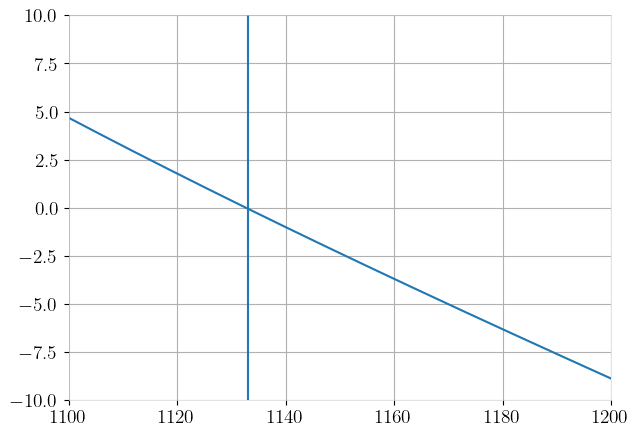

In [15]:
plt.plot(P['lambda'], P['ae_s']-P['ae_t']/2-P['ae_v']/2-P['ag_s'])
plt.xlim(1100,1200)
plt.ylim(-10,10)
plt.axvline(x=1133)
plt.grid()